### FIFA 21 Data Quality Check

##### Let us start by importing relevant libraries

In [1]:
#Importing Libraries and loading data sets
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('fifa21 raw data v2.csv')
dp = pd.read_csv('fifa21_raw_data.csv')

we would be making use of only the version 2 which is the df dataframe 

In [2]:
#having a look at the avialable data
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [3]:
dp.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


### Data Description for the version 2 and 1
Here is a brief documentation for each column name in the given dataset:

photoUrl: The URL of the player's photo.

LongName: The full name of the player.

playerUrl: The URL of the player's page on sofifa.com.

Nationality: The nationality of the player.

Positions: The positions the player can play.

Name: The short name of the player.

Age: The age of the player.

OVA: The overall rating of the player in FIFA 21.

POT: The potential rating of the player in FIFA 21.

Team & Contract: The team the player is playing for in FIFA 21, along with their contract details.

ID: The unique identifier for the player.

Height: The height of the player in feet and inches.

Weight: The weight of the player in pounds.

foot: The preferred foot of the player.


BOV: The best overall rating the player has achieved in their career.

BP: The best position the player has played in their career.

Growth: The difference between the potential rating and overall rating of the player.

Joined: The date the player joined their current team in FIFA 21.

Loan Date End: The date the player's loan contract ends.

Value: The market value of the player in FIFA 21.

Wage: The weekly wage of the player in FIFA 21.

Release Clause: The release clause value of the player in FIFA 21.

Attacking: The attacking attributes of the player.

Crossing: The crossing attribute of the player.

Finishing: The finishing attribute of the player.

Heading Accuracy: The heading accuracy attribute of the player.

Short Passing: The short passing attribute of the player.

Volleys: The volleys attribute of the player.

Skill: The skill attributes of the player.

Dribbling: The dribbling attribute of the player.

Curve: The curve attribute of the player.

FK Accuracy: The free kick accuracy attribute of the player.

Long Passing: The long passing attribute of the player.

Ball Control: The ball control attribute of the player.

Movement: The movement attributes of the player.

Acceleration: The acceleration attribute of the player.

Sprint Speed: The sprint speed attribute of the player.

Agility: The agility attribute of the player.

Reactions: The reactions attribute of the player.

Balance: The balance attribute of the player.

Power: The power attributes of the player.

Shot Power: The shot power attribute of the player.

Jumping: The jumping attribute of the player.

Stamina: The stamina attribute of the player.

Strength: The strength attribute of the player.

Long Shots: The long shots attribute of the player.

Mentality: The mentality attributes of the player.

Aggression: The aggression attribute of the player.

Interceptions: The interceptions attribute of the player.

Positioning: The positioning attribute of the player.

Vision: The vision attribute of the player.

Penalties: The penalties attribute of the player.

Composure: The composure attribute of the player.

Defending: The defending attributes of the player.

Marking: The marking attribute of the player.

Standing Tackle: The standing tackle attribute of the player.

Sliding Tackle: The sliding tackle attribute of the player.

Goalkeeping: The goalkeeping attributes of the player.

GK Diving: The goalkeeper diving attribute of the player.

GK Handling: The goalkeeper handling attribute of the player.

GK Kicking: The goalkeeper kicking attribute of the player.

GK Positioning: The goalkeeper positioning attribute of the player.

GK Reflexes: This refers to the goalkeeper's ability to react and make saves quickly.

Total Stats: This refers to the overall rating of the player based on their performance in all areas of the game.

Base Stats: This refers to the player's rating in the six main areas of the game: Pace, Shooting, Passing, Dribbling, Defending, and Physicality.

W/F: This refers to the player's weaker foot ability.

SM: This refers to the player's skill moves ability. 

A/W: This refers to the player's attacking work rate. It measures how frequently the player participates in attacking actions, 
such as making runs or positioning themselves in the opponent's half.

D/W: This refers to the player's defensive work rate. It measures how frequently the player participates in defensive actions, such as tracking back or making tackles.

IR: This refers to the player's injury resistance. It measures the player's ability to avoid injuries and how quickly they 
recover from them.

PAC: This refers to the player's pace or speed attribute. It measures how quickly the player can move with and without the ball.

SHO: This refers to the player's shooting ability. It measures the player's accuracy and power when shooting the ball.

PAS: This refers to the player's passing ability. It measures the player's accuracy and range when passing the ball.

DRI: This refers to the player's dribbling ability. It measures the player's agility, balance, and ball control when dribbling the ball.

DEF: This refers to the player's defensive ability. It measures the player's ability to tackle, intercept, and defend against opposing players. 

PHY: This refers to the player's physicality or strength. It measures the player's ability to win physical battles and maintain possession of the ball. 

Hits: This refers to the number of times the player's profile has been viewed on the website.

### Data Cleaning steps:

Data cleaning is a crucial step in the data analysis process that involves identifying and correcting errors, inconsistencies, and missing values in a dataset. Here are some general steps we will follow when performing the FIFA 2021 data cleaning:

1.Identify the data quality issues: We start by exploring the data to identify any data quality issues, such as missing values, duplicates, incorrect data types, or inconsistent formatting.


2.Remove duplicates: If we find duplicate records in the dataset, we remove them to avoid overrepresentation of certain data points.


3.Handle missing values: We will Decide how to handle missing values, whether by imputing them with a reasonable estimate, deleting the entire record or column, or keeping them as missing values.

4.Standardize data format: We will Standardize the format of your data to ensure consistency, for example, by converting data to a common data type or unit of measurement.


5.Check for outliers: We will also identify and deal with outliers that can skew the results or adversely affect the analysis.

6.Document data cleaning steps: Keep track of the steps we have taken during data cleaning, so that others can understand how we have processed the data and reproduce our results.


By following these general steps(not in particular order), we can perform effective data cleaning that will help you get better insights from your data

### 1.Getting an Understanding of the data

In [4]:
#An overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

We are able see from the overview that out data has a some incorrect datatype and NaN values which we would have to deal with going forward.

In [5]:
#let's look at all the columns
pd.set_option('display.max_columns',None)
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [6]:
###Looking at how many rows and collumns in the data set
df.shape

(18979, 77)

### 1.1 Dealing with inconsistent formatting and Standardising our Datatype
1.Height

2.Weight

3.Joined

4.Loan Date End

5.Value

6.Release Clause

7.Wage

8.W/f

9.SM

10.IR

In [7]:
#Making a copy from our original data to avoid making permanent change on the data and incase we want to use it again for other
#process.
df1 = df.copy()

In [8]:
###Height should be changed to int by removing the CM and renaming the height column as Height(cm)
df1['Height'] = df1['Height'].str.replace('cm','')

In [9]:
df1['Height'].unique()
# we see that there are more problems than just the "cm" so we would have to convert the feets to "cm"

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [10]:
df1['Height'] = df1['Height'].str.replace('5\'4"','163')

In [11]:
df1['Height'] = df1['Height'].str.replace('5\'6"','168')

In [12]:
df1['Height'] = df1['Height'].str.replace('5\'7"','170')

In [13]:
df1['Height'] = df1['Height'].str.replace('5\'9"','175')

In [14]:
df1['Height'] = df1['Height'].str.replace('5\'10"','178')

In [15]:
df1['Height'] = df1['Height'].str.replace('5\'11"','180')

In [16]:
df1['Height'] = df1['Height'].str.replace('6\'0"','183')

In [17]:
df1['Height'] = df1['Height'].str.replace('6\'1"','185')

In [18]:
df1['Height'] = df1['Height'].str.replace('6\'2"','188')

In [19]:
df1['Height'] = df1['Height'].str.replace('6\'3"','191')

In [20]:
df1['Height'] = df1['Height'].str.replace('6\'4"','193')

In [21]:
df1['Height'] = df1['Height'].str.replace('6\'5"','196')

In [22]:
df1['Height'].unique()
#the height has been completely clean but we would not change the datatype yet to int
#let us clean all the inconsistencies first before the conversion

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '164', '198', '201', '158', '162', '161', '160', '203', '157',
       '156', '202', '159', '206', '155'], dtype=object)

In [23]:
#Looking at weight
df1['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [24]:
#first we drop kg and then convert the pounds to kg too
df1['Weight'] = df1['Weight'].str.replace('kg','')

df1['Weight'] = df1['Weight'].str.replace('146lbs','66')
df1['Weight'] = df1['Weight'].str.replace('148lbs','67')
df1['Weight'] = df1['Weight'].str.replace('130lbs','59')
df1['Weight'] = df1['Weight'].str.replace('179lbs','81')
df1['Weight'] = df1['Weight'].str.replace('172lbs','78')
df1['Weight'] = df1['Weight'].str.replace('196lbs','89')
df1['Weight'] = df1['Weight'].str.replace('176lbs','80')
df1['Weight'] = df1['Weight'].str.replace('185lbs','84')
df1['Weight'] = df1['Weight'].str.replace('170lbs','77')
df1['Weight'] = df1['Weight'].str.replace('203lbs','92')
df1['Weight'] = df1['Weight'].str.replace('168lbs','76')
df1['Weight'] = df1['Weight'].str.replace('161lbs','73')
df1['Weight'] = df1['Weight'].str.replace('190lbs','86')
df1['Weight'] = df1['Weight'].str.replace('174lbs','79')
df1['Weight'] = df1['Weight'].str.replace('165lbs','75')
df1['Weight'] = df1['Weight'].str.replace('159lbs','72')
df1['Weight'] = df1['Weight'].str.replace('192lbs','87')
df1['Weight'] = df1['Weight'].str.replace('181lbs','82')
df1['Weight'] = df1['Weight'].str.replace('139lbs','63')
df1['Weight'] = df1['Weight'].str.replace('154lbs','70')
df1['Weight'] = df1['Weight'].str.replace('157lbs','71')
df1['Weight'] = df1['Weight'].str.replace('163lbs','74')
df1['Weight'] = df1['Weight'].str.replace('183lbs','83')

In [25]:
df1['Weight'].unique()
# we were able to successful convert the pounds to kilogrammes

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '98', '103', '99',
       '102', '56', '101', '57', '55', '104', '107', '110', '53', '50',
       '54', '52'], dtype=object)

### Next we look at the currency attributes

In [26]:
#Looking at the value attribute, let us remove the euro symbol and convert M to millon in numbers
def convert_currency(amount):
    amount = amount.replace('€','') #removing currency symbol
    if 'M' in amount:
        amount = float(amount.replace('M','')) * 1000000 # convert to million
    elif 'K' in amount:
        amount = float(amount.replace('K','')) * 1000 #convert to thousands
    else:
        amount = float(amount)
    return amount

df1['Value'] = df1['Value'].apply(convert_currency)

In [27]:
df1['Wage'] = df1['Wage'].apply(convert_currency)

In [28]:
df1['Release Clause'] = df1['Release Clause'].apply(convert_currency)

In [29]:
#Updated dataFrame
df1.head()
#we see that value, wage and release clause attribute has been appropriately transfomed

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [30]:
#Renaming the attribubtes
df1 = df1.rename(columns={'↓OVA':'OVA','Height':'Height(CM)', 'Weight':'Weight(Kg)','Value':'Value(euro)'
                        ,'Wage':'Wage(euro)','Release Clause':'Release Clause(euro)','W/F':'W/F(★)'
                        ,'SM':'SM(★)','IR':'IR(★)'})
#Updated DataFrame
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [31]:
#removing the star symbol in w/f,sm.ir
df1['W/F(★)'] = df1['W/F(★)'].str.replace('★','')
df1['SM(★)'] = df1['SM(★)'].str.replace('★','')
df1['IR(★)'] = df1['IR(★)'].str.replace('★','')

In [32]:
df1.head()
#Updated DataFrame

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


### 1.2 Dealing with Incorrect Datatypes

In [33]:
#Looking at Joined
list(df1['Joined'].unique())
### we see that we have to convert the date to yyyy/mm/dd format which is in a datetime format

['Jul 1, 2004',
 'Jul 10, 2018',
 'Jul 16, 2014',
 'Aug 30, 2015',
 'Aug 3, 2017',
 'Jul 1, 2014',
 'Jul 1, 2017',
 'Jul 19, 2018',
 'Jul 1, 2018',
 'Jan 1, 2018',
 'Jul 1, 2016',
 'Jul 11, 2013',
 'Aug 9, 2018',
 'Jul 1, 2011',
 'Jul 9, 2009',
 'Aug 1, 2005',
 'Jul 28, 2011',
 'Jul 14, 2015',
 'Jul 16, 2016',
 'Jul 1, 2015',
 'Jul 1, 2010',
 'Jul 1, 2012',
 'Jul 1, 2019',
 'Jul 17, 2014',
 'Jul 12, 2019',
 'Aug 31, 2017',
 'Oct 7, 2015',
 'Jul 21, 2017',
 'Jan 30, 2018',
 'Jan 30, 2020',
 'Aug 28, 2015',
 'Jul 6, 2015',
 'Sep 2, 2019',
 'Jul 1, 2005',
 'Sep 1, 2008',
 'Jan 31, 2018',
 'Jul 19, 2017',
 'Aug 6, 2015',
 'Aug 1, 2012',
 'Sep 25, 2020',
 'Aug 31, 2012',
 'Jul 27, 2016',
 'Aug 10, 2008',
 'Jul 5, 2013',
 'Jul 18, 2012',
 'Aug 9, 2016',
 'May 1, 2012',
 'Jul 1, 2008',
 'Aug 17, 2020',
 'Sep 2, 2014',
 'Jun 9, 2011',
 'Jul 4, 2019',
 'Jan 20, 2017',
 'Sep 4, 2020',
 'Jul 18, 2019',
 'Jul 7, 2017',
 'Jul 15, 2020',
 'Jul 1, 2020',
 'Jul 12, 2018',
 'Jul 19, 2013',
 'Jun 9, 201

In [34]:
#convert to datetime format
df1['Joined'] = pd.to_datetime(df1['Joined'], format = '%b %d, %Y')

#convert to yyyy/mm/dd format
df1['Joined'] = df1['Joined'].dt.strftime('%Y/%m/%d')

In [35]:
df1['Joined'].loc[150:200]
#we see that we have been able to properly convert the Joined column to datetime now we do the same for the Loan Date End column

150    2020/09/14
151    2020/01/29
152    2015/06/20
153    2015/04/29
154    2020/09/02
155    2019/07/10
156    2018/06/09
157    2019/07/01
158    2016/07/22
159    2018/07/02
160    2016/08/03
161    2016/08/31
162    2018/01/31
163    2012/08/09
164    2019/05/17
165    2012/09/13
166    2015/02/02
167    2019/08/07
168    2015/08/11
169    2018/08/31
170    2011/08/16
171    2016/07/12
172    2018/07/16
173    2019/07/07
174    2014/07/01
175    2020/01/17
176    2019/07/01
177    2020/09/23
178    2019/07/12
179    2018/07/03
180    2020/08/13
181    2019/07/17
182    2013/07/01
183    2011/07/01
184    2015/08/13
185    2016/07/01
186    2018/07/23
187    2017/07/05
188    2015/02/02
189    2019/07/02
190    2018/07/01
191    2009/08/01
192    2018/01/06
193    2017/01/01
194    2015/01/21
195    2018/07/11
196    2016/07/01
197    2019/08/07
198    2019/01/15
199    2018/07/02
200    2020/09/05
Name: Joined, dtype: object

In [36]:
#looking at the datatype again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    18979 non-null  int64  
 1   Name                  18979 non-null  object 
 2   LongName              18979 non-null  object 
 3   photoUrl              18979 non-null  object 
 4   playerUrl             18979 non-null  object 
 5   Nationality           18979 non-null  object 
 6   Age                   18979 non-null  int64  
 7   OVA                   18979 non-null  int64  
 8   POT                   18979 non-null  int64  
 9   Club                  18979 non-null  object 
 10  Contract              18979 non-null  object 
 11  Positions             18979 non-null  object 
 12  Height(CM)            18979 non-null  object 
 13  Weight(Kg)            18979 non-null  object 
 14  Preferred Foot        18979 non-null  object 
 15  BOV                

In [37]:
#Now we use the opportunity to change the datatype of height and weight to int
df1['Height(CM)'] = df1['Height(CM)'].astype(int)
df1['Weight(Kg)'] = df1['Weight(Kg)'].astype(int)

In [38]:
df1['Height(CM)'].dtypes
#updated datatype

dtype('int32')

In [39]:
df1['Weight(Kg)'].dtypes
#Updated datatype

dtype('int32')

### Back to dealing with more inconsistencies

In [40]:
#We looked at the Nationality to POT and did not see anything in need of cleaning yet
#So we look at Cleaning the Club and Contract

#Remove the \n\n\n\n characters from the Club columns
df1['Club'] = df1['Club'].str.replace('\n','')

#Updated dataframe
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014/07/16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


In [41]:
#Converting 2004~2021 to 2004-2021 and so on
#Replace the ~ character with - in the Contract column
df1['Contract'] = df1['Contract'].str.replace('~','-')

#Updated dataframe
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,NaN,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,NaN,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,NaN,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,NaN,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,NaN,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


### 1.3 Handling Missing Values and Dropping Columns

In [42]:
### Here we would fill the NaN value for Hits as 0 because leaving it as blank
### simply means it was not viewed at all
df1['Hits'] = df1['Hits'].fillna(0)
#updated data
df1.tail()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178,66,Right,49,CB,2018/07/13,NaN,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175,65,Right,51,CAM,2020/08/01,NaN,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,0
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,Derry City,2019 - 2020,CM,179,74,Right,49,CAM,2019/03/08,NaN,120000.0,500.0,131000.0,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,0
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,Dalian YiFang FC,2020 - 2022,RW,175,69,Right,48,ST,2020/09/22,NaN,100000.0,2000.0,88000.0,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,0
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,Dalian YiFang FC,2019 - 2023,"CB, LB",188,75,Left,50,LB,2019/07/29,NaN,100000.0,1000.0,79000.0,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,136,45,46,45,50,10,11,7,10,12,1215,265,3,2,Medium,Medium,1,62,22,39,42,45,55,0


In [43]:
###Converting values in Hits column which are in K to the thousands

df1['Hits'] = df1['Hits'].replace({'k':'000','K':'000'}, regex = True).astype(float)
#Updated data
df1['Hits']

0        771.0
1        562.0
2        150.0
3        207.0
4        595.0
         ...  
18974      0.0
18975      0.0
18976      0.0
18977      0.0
18978      0.0
Name: Hits, Length: 18979, dtype: float64

In [44]:
df1['Contract'].unique()
#looking at the unique values that is common in the Contarct column

array(['2004 - 2021', '2018 - 2022', '2014 - 2023', '2015 - 2023',
       '2017 - 2022', '2017 - 2023', '2018 - 2024', '2014 - 2022',
       '2018 - 2023', '2016 - 2023', '2013 - 2023', '2011 - 2023',
       '2009 - 2022', '2005 - 2021', '2011 - 2021', '2015 - 2022',
       '2017 - 2024', '2010 - 2024', '2012 - 2021', '2019 - 2024',
       '2015 - 2024', '2017 - 2025', '2020 - 2025', '2019 - 2023',
       '2008 - 2023', '2015 - 2021', '2020 - 2022', '2012 - 2022',
       '2016 - 2025', '2013 - 2022', '2011 - 2022', '2012 - 2024',
       '2016 - 2021', '2012 - 2023', '2008 - 2022', '2019 - 2022',
       '2017 - 2021', '2013 - 2024', '2020 - 2024', '2010 - 2022',
       '2020 - 2021', '2011 - 2024', '2020 - 2023', '2014 - 2024',
       '2013 - 2026', '2016 - 2022', '2010 - 2021', '2013 - 2021',
       '2019 - 2025', '2018 - 2025', '2016 - 2024', '2018 - 2021',
       '2009 - 2024', '2007 - 2022', 'Jun 30, 2021 On Loan',
       '2009 - 2021', '2019 - 2021', '2019 - 2026', 'Free', '2012 - 

In [45]:
df1['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [46]:
# This shows the rows where 'Loan Date End' have values, which is not alot
df1.loc[df['Loan Date End'].notnull()]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,https://cdn.sofifa.com/players/173/731/21_60.png,http://sofifa.com/player/173731/gareth-bale/21...,Wales,30,83,83,Tottenham Hotspur,"Jun 30, 2021 On Loan",RW,185,82,Left,83,RW,2013/09/01,"Jun 30, 2021",35000000.0,200000.0,0.0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3,4,Medium,Medium,4,88,84,82,80,58,73,282.0
248,193105,A. Areola,Alphonse Areola,https://cdn.sofifa.com/players/193/105/21_60.png,http://sofifa.com/player/193105/alphonse-areol...,France,27,82,86,Fulham,"Jun 30, 2021 On Loan",GK,195,94,Right,82,GK,2010/07/01,"Jun 30, 2021",32000000.0,71000.0,0.0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3,1,Medium,Medium,2,85,79,80,84,55,78,94.0
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,https://cdn.sofifa.com/players/200/888/21_60.png,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,28,82,82,Paris Saint-Germain,"Jun 30, 2021 On Loan","CDM, CM",188,83,Right,82,CDM,2015/07/02,"Jun 30, 2021",27000000.0,20000.0,0.0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3,3,Medium,High,3,66,63,72,73,80,85,285.0
302,216409,M. Politano,Matteo Politano,https://cdn.sofifa.com/players/216/409/21_60.png,http://sofifa.com/player/216409/matteo-politan...,Italy,26,81,81,Napoli,"Jun 30, 2021 On Loan","RM, RW, ST",171,67,Left,81,RM,2019/07/01,"Jun 30, 2021",28000000.0,105000.0,0.0,350,80,76,40,79,75,399,83,79,77,76,84,423,84,82,89,81,87,329,78,51,77,41,82,324,63,38,76,77,70,79,121,63,29,29,48,11,12,6,8,11,1994,419,4,4,High,Medium,2,83,77,78,84,42,55,93.0
306,223959,L. Torreira,Lucas Torreira,https://cdn.sofifa.com/players/223/959/21_60.png,http://sofifa.com/player/223959/lucas-torreira...,Uruguay,24,81,85,Atlético Madrid,"Jun 30, 2021 On Loan","CDM, CM",166,60,Right,82,CDM,2018/07/12,"Jun 30, 2021",33500000.0,74000.0,0.0,336,71,61,59,80,65,373,77,70,72,75,79,401,76,72,85,78,90,354,78,52,83,67,74,359,86,83,68,74,48,78,240,80,83,77,39,5,5,13,7,9,2102,448,3,3,Medium,High,2,74,67,75,79,79,74,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,242601,M. Najjar,Moudi Najjar,https://cdn.sofifa.com/players/242/601/21_60.png,http://sofifa.com/player/242601/moudi-najjar/2...,Australia,20,52,65,Macarthur FC,"Aug 31, 2021 On Loan",ST,182,72,Left,54,ST,2018/02/13,"Aug 31, 2021",190000.0,2000.0,0.0,215,29,55,53,48,30,195,52,30,33,28,52,308,68,66,63,48,63,277,51,69,54,54,49,203,42,11,48,46,56,48,57,23,15,19,47,12,7,13,6,9,1302,283,3,3,High,Low,1,67,51,39,53,21,52,0.0
18571,236818,A. Read,Arthur Read,https://cdn.sofifa.com/players/236/818/21_60.png,http://sofifa.com/player/236818/arthur-read/21...,England,20,51,63,Stevenage,"Jun 30, 2021 On Loan","CM, RW, LW",178,64,Left,55,CAM,2019/07/12,"Jun 30, 2021",140000.0,5000.0,0.0,233,50,46,31,61,45,250,59,41,36,54,60,281,55,58,66

From the previous result, we notice that our Loan date end is really similar to the contract column. So we will look towards getting the year from contract columns and use them in the Loan Date End column. Futhermore, we will be looking towards creating a new column which we will call the "Contract expiry year". This new column would consist of the end year in the Contract. We would also be dropping both contract and Loan Date End column since they are not really needed afterwards.

In [47]:
# Create a new column which contains the split values and remove any space in Loan date end,
# then we move towards dropping the month column

df1[['month','Contract Expiry Year']] = df1['Loan Date End'].str.split(',', expand = True).apply(lambda x: x.str.strip())
df1.drop(['month','Loan Date End'] , axis =1, inplace = True)
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,NaN
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,NaN
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,NaN
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,NaN
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,NaN


In [48]:
# We keep the last 4 characters of each value in our contract column and fill the NAN values in our Contract Expiry Year 
# with the output

lastFourchars = df1['Contract'].apply(lambda x : x[-4:])
df1['Contract Expiry Year'] = df1['Contract Expiry Year'].fillna(lastFourchars)
df1.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,2022
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,2023
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,2022


In [49]:
#Making another deep copy ofour current data
df2 = df1.copy()

In [50]:
df2

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,Contract,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 - 2021,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 - 2022,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,2022
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 - 2023,GK,188,87,Right,91,GK,2014/07/16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,2023
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 - 2023,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 - 2022,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,2018 - 2022,CB,178,66,Right,49,CB,2018/07/13,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0.0,2022
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,2020 - 2021,CM,175,65,Right,51,CAM,2020/08/01,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,

In [51]:
# Dropping irrelevant columns column

df2.drop(['Contract','Name','photoUrl','playerUrl'], axis = 1, inplace = True)

### Dealing with Duplicates

In [52]:
#Check for duplicates
duplicates = df1.duplicated()
print(df1[duplicates])
#there are no duplicated data in this dataset

Empty DataFrame
Columns: [ID, Name, LongName, photoUrl, playerUrl, Nationality, Age, OVA, POT, Club, Contract, Positions, Height(CM), Weight(Kg), Preferred Foot, BOV, Best Position, Joined, Value(euro), Wage(euro), Release Clause(euro), Attacking, Crossing, Finishing, Heading Accuracy, Short Passing, Volleys, Skill, Dribbling, Curve, FK Accuracy, Long Passing, Ball Control, Movement, Acceleration, Sprint Speed, Agility, Reactions, Balance, Power, Shot Power, Jumping, Stamina, Strength, Long Shots, Mentality, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Defending, Marking, Standing Tackle, Sliding Tackle, Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, Total Stats, Base Stats, W/F(★), SM(★), A/W, D/W, IR(★), PAC, SHO, PAS, DRI, DEF, PHY, Hits, Contract Expiry Year]
Index: []


### 2. Outliers The Silent Killer.

##### WHAT IS AN OUTLIER?
Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.

#### 2.1 VISUALIZING THE DATA
Although there are a good variety of outlier detection technique, data visualization is really useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers.

1. Box and whisker plot (box plot).

2. Scatter plot.

3. Histogram.

4. Distribution Plot.

5. QQ plot.

In [53]:
#Looking at the data
df2.head(2)

,ID,LongName,Nationality,Age,OVA,POT,Club,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,2022


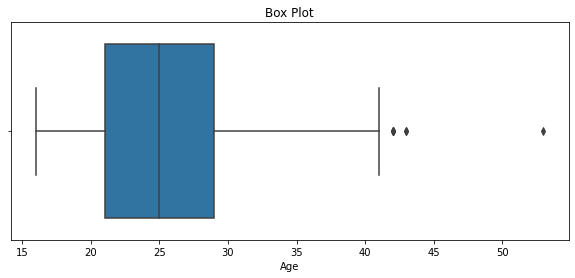

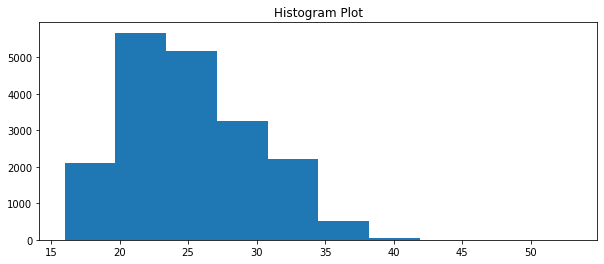

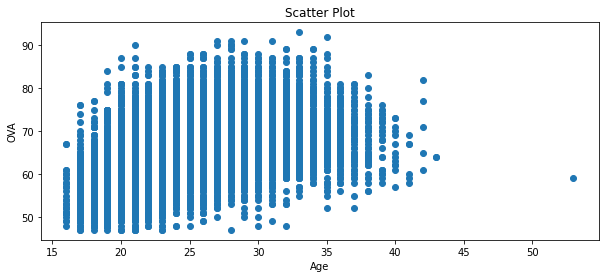

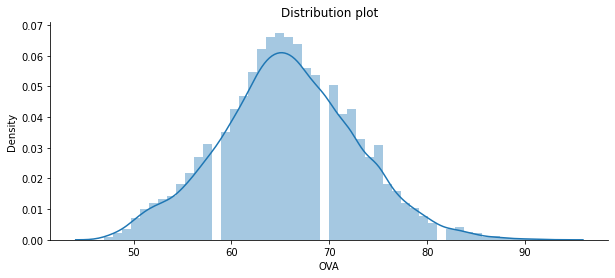

<Figure size 720x288 with 0 Axes>

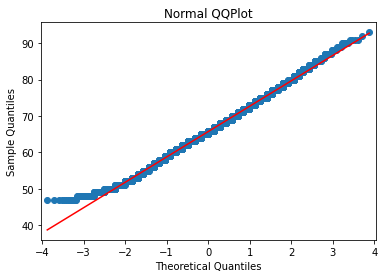

In [54]:
###Looking at a visual for Age and OVA
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df2['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df2['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('OVA')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(df2['Age'],df2['OVA'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df2['OVA'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df2['OVA'])

### What comes Next?
After detecting the outlier we should remove\treat the outlier because it is a silent killer.

* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.


#### DELETING OBSERVATIONS:
We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.
In this FIFA 21 dataset we would be lookin at the outliers in the columns of Age, Height and Weight

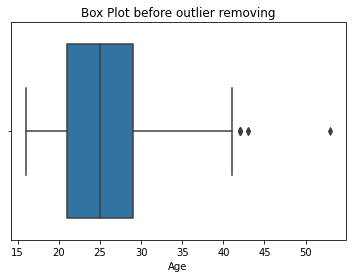

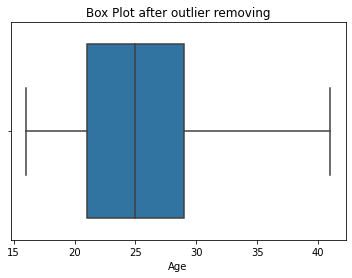

In [55]:
### WE would be making use of Box Plot to visualize the outliers
sns.boxplot(df2['Age'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Age')
sns.boxplot(df2['Age'])
plt.title("Box Plot after outlier removing")
plt.show()

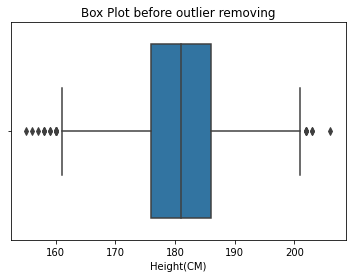

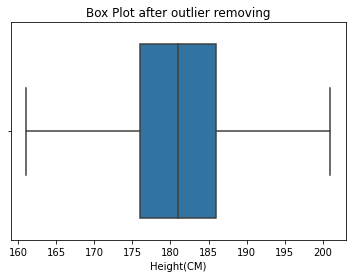

In [56]:
##Looking at the Height
sns.boxplot(df2['Height(CM)'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Height(CM)')
sns.boxplot(df2['Height(CM)'])
plt.title("Box Plot after outlier removing")
plt.show()

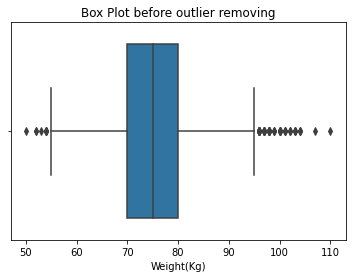

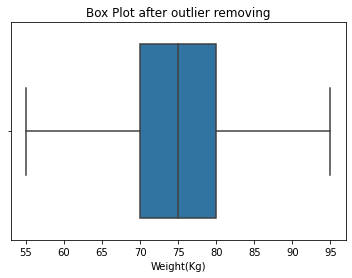

In [57]:
##Looking at the Height
sns.boxplot(df2['Weight(Kg)'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Weight(Kg)')
sns.boxplot(df2['Weight(Kg)'])
plt.title("Box Plot after outlier removing")
plt.show()

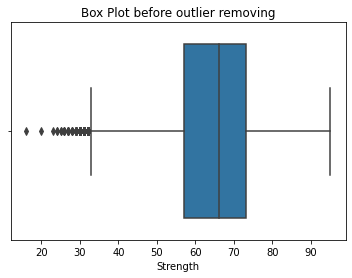

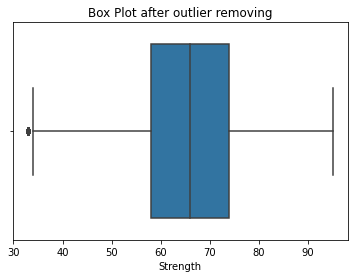

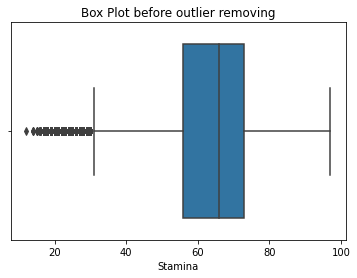

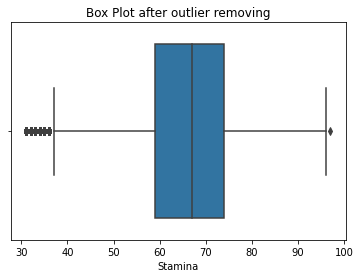

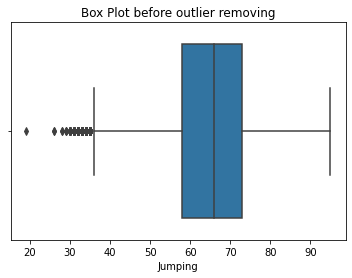

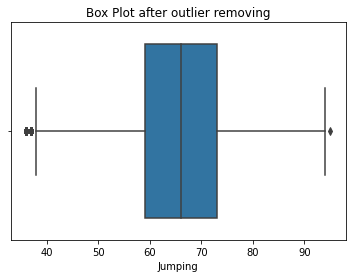

In [58]:
### Lets also lokk at outliers in strength stamina and jumping
sns.boxplot(df2['Strength'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Strength')
sns.boxplot(df2['Strength'])
plt.title("Box Plot after outlier removing")
plt.show()

sns.boxplot(df2['Stamina'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Stamina')
sns.boxplot(df2['Stamina'])
plt.title("Box Plot after outlier removing")
plt.show()

sns.boxplot(df2['Jumping'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df2, 'Jumping')
sns.boxplot(df2['Jumping'])
plt.title("Box Plot after outlier removing")
plt.show()

In [59]:
df2

,ID,LongName,Nationality,Age,OVA,POT,Club,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,2022
2,200389,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,2014/07/16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,2023
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,2023
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Ao Xia,China PR,21,47,55,Wuhan Zall,CB,178,66,Right,49,CB,2018/07/13,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0.0,2022
18975,258760,Ben Hough,England,17,47,67,Oldham Athletic,CM,175,65,Right,51,CAM,2020/08/01,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,0.0,2021
18976,252757,Ronan McKinley,England,18,47,65,Derry City,CM,179,74,Right,49,CAM,2019/03/08,120000.0,500.0,131000.0,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,0.0,2020
18977,243790,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,RW,175,69,Right,48,ST,2020/09/22,100000.0,2000.0,88000.0,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,0.0,2022


### Dealing with special characters and accented names

In [60]:
#import the unidecode library to convert accented characters to plain english alternatives
#identify the columns that have accented characters using the 'dtypes' attribute of the dataframe
from unidecode import unidecode
object_cols = df2.select_dtypes(include=['object']).columns

In [61]:
#we then replace accented charaters with plain english alternatives using unidecode function
for LongName in object_cols:
    df2[LongName] = df2[LongName].apply(lambda x: unidecode(x))

### Conclusion

We have been able to sucessfully clean the messy FIFA 21 Dataset by assigning appropriate data types, filling NaN values, dealing with inconsistent datatypes and finally Outliers. We can now move forward to extracting our clean data.

In [62]:
df2.to_csv("Clean_FIFA21.csv",index=False)
df2
#end

,ID,LongName,Nationality,Age,OVA,POT,Club,Positions,Height(CM),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Value(euro),Wage(euro),Release Clause(euro),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F(★),SM(★),A/W,D/W,IR(★),PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Expiry Year
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,2004/07/01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771.0,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,2018/07/10,63000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562.0,2022
2,200389,Jan Oblak,Slovenia,27,91,93,Atletico Madrid,GK,188,87,Right,91,GK,2014/07/16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150.0,2023
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,2015/08/30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207.0,2023
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,2017/08/03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Ao Xia,China PR,21,47,55,Wuhan Zall,CB,178,66,Right,49,CB,2018/07/13,100000.0,1000.0,70000.0,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0.0,2022
18975,258760,Ben Hough,England,17,47,67,Oldham Athletic,CM,175,65,Right,51,CAM,2020/08/01,130000.0,500.0,165000.0,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,0.0,2021
18976,252757,Ronan McKinley,England,18,47,65,Derry City,CM,179,74,Right,49,CAM,2019/03/08,120000.0,500.0,131000.0,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,0.0,2020
18977,243790,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,RW,175,69,Right,48,ST,2020/09/22,100000.0,2000.0,88000.0,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,0.0,2022
